In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#from scipy.stats import binom
from scipy.stats import weibull_min
#conda install fitter


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

In [2]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


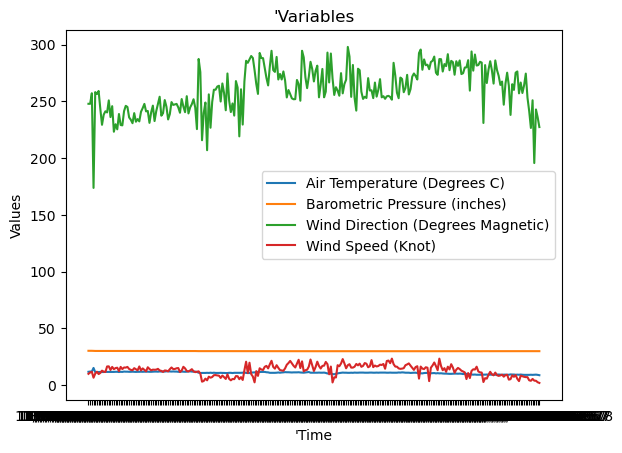

In [3]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [4]:
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()

NameError: name 'df2' is not defined

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [ ]:
df1['SensorTimestamp']


In [ ]:
pd.to_datetime(df1['SensorTimestamp'])

new variable datetime added

In [ ]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [ ]:
df1['datetime']


In [ ]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

In [ ]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

In [ ]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
#plt.xlabel("'Time")
#plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [ ]:
df3

In [ ]:
df3.describe()

In [ ]:
sns.pairplot(df3)
plt.show()

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

In [ ]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

In [ ]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='ro', title="Air Temp and Wind Speed")

Displaying data types of each variable

In [ ]:
df3.dtypes

In [ ]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [ ]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")
idx1

In [ ]:
rng1 = np.random.default_rng()
mu1, sigma1 = 10.42, .76
ts1 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts1

In [ ]:
ts1.hist('Synthesised Air Temperature (Degrees C)')
plt.show()

In [ ]:
sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

In [ ]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts1['Synthesised Air Temperature (Degrees C)'],shade=True)
#sns.kdeplot(x,shade=True)
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True)

In [ ]:
#sns.kdeplot(ts1['Synthesised Air Temperature (Degrees C)'],shade=True)

In [ ]:
df3.hist('Wind Speed (Knot)')
plt.show()

In [ ]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(x,shade=True)


In [ ]:
idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
idx2

In [ ]:
rng1 = np.random.default_rng()
mu1, sigma1 = 13.04, 5.29
ts2 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx2)),index =idx2, columns=['Synthesised Wind Speed (Knot)'])
ts2

In [ ]:
#rng1 = np.random.default_rng()
#shape = 5.0
#scale = 2.0
#values = weibull_min.rvs(2.1,8.5, size=100)
#ts2 = pd.DataFrame(data=rng1.weibull(15,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
#ts2

In [ ]:
ts2.hist()
plt.show()

In [ ]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

In [ ]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [ ]:
#sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

In [ ]:
rng1 = np.random.default_rng()
mu1, sigma1 = 29.85, 0.02
ts3 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

In [ ]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

In [ ]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [ ]:
#sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [ ]:
#sns.kdeplot(df3['Wind Speed (Knot)'],shade=True, label="actual")
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [ ]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [ ]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [ ]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [ ]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [ ]:
#idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
#idx1

In [ ]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [ ]:
#ts1.hist('Synthesises Weibull')
plt.show()

In [ ]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

In [ ]:
#sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [ ]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

In [ ]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [ ]:
result=pd.concat([ts1,ts2,ts3,ts4])
result

In [ ]:
df1.hist('Barometric Pressure (inches)')
plt.show()

In [ ]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [ ]:
np.random.seed(420)

# Generate random dataset from the Weibull distribution
size = 10000
k = 20
lambda_ = 30
data = np.random.weibull(k, size) * lambda_
data

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [ ]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

In [ ]:
rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

In [ ]:
ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded']), 
#ts = pd.DataFrame(data=rng.poisson(25,len(idx)),index =idx, columns=['Incidents recorded1'])
#ts1 = pd.DataFrame(data=rng.binomial(p = .75,len(idx)),index =idx, columns=['Incidents recorded1'])

In [ ]:
ts


In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

In [ ]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [ ]:
idx4 = pd.date_range(start = "2023-11-08 14:54:33", periods=250, freq="MIN")
idx4
mu1, sigma1 = 10.55, .67
rng4 = np.random.default_rng()
ts4 = pd.DataFrame(data=rng1.poisson(10.55,len(idx1)),index =idx4, columns=['Synthesisd )'])
ts4



In [ ]:
import numpy as np

x = np.random.poisson(lam=13.5, size=100)

sns.kdeplot(x,shade=True)

In [ ]:
sns.kdeplot(ts4['Synthesisd )'], shade=True, label="simulated")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Normal distribution variables
mu1, sigma1 = 10.55, .67
mu2, sigma2 = 0, 1
normal1 = np.random.normal(mu1, sigma1, 180)
normal2 = np.random.normal(mu2, sigma2, 180)

# Weibull distribution variables
a1, b1 = 2.1, 8.5
a2, b2 = 5, 2
weibull1 = np.random.weibull(a1, 180) * b1
weibull2 = np.random.weibull(a2, 180) * b2

# Create dataframe
df23 = pd.DataFrame({
    'normal1': normal1,
    'normal2': normal2,
    'weibull1': weibull1,
    'weibull2': weibull2
})

In [ ]:
from scipy import stats
#from fitter import Fitter

# Generate some sample data
data = stats.norm.rvs(loc=0, scale=1, size=1000)

# Create a Fitter instance and fit the data
#f = Fitter(data)
#f.fit()
# Print the summary of the best-fitted distribution
f.summary()

In [ ]:
# Plot dataframe
#sns.kdeplot(df['normal1'], shade=True, label="simulated")
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#df.plot(kind='scatter', x='normal1', y='normal2', color='red')
#plt.legend
#plt.show()
#sns.kdeplot(df23['weibull1'], shade=True, label="simulated")
#plt.title('wiebull')
##plt.show()
#df.plot(kind='bar', x='weibull1', y='weibull2', color='green')
#plt.title('Bar Plot')
#plt.show()

#df.plot(kind='line', x='normal1', y='weibull1', color='blue')
#plt.title('Line Plot')
#plt.show()

In [ ]:
df3.describe()

In [ ]:
df4 = df3.drop(['SensorTimestamp'],axis =1)
df4

In [ ]:
import scipy.stats as stats
import numpy as np

# Load the data from the CSV file
dat = np.loadtxt('data.csv')
#data = dat.drop(['SensorTimestamp','Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)",'Air Temperature (Degrees C)','Barometric Pressure (inches)','Wind Direction (Degrees Magnetic)'],axis =1)
dat

In [ ]:
params = stats.weibull_min.fit(dat)
shape= params

# Print the shape and scale parameters
print("Shape parameter (k):", shape)
#print("Scale parameter (lambda):", scale)

Rayleigh PDF 

In [ ]:
# Weibull distribution variables
a1, b1 = 1, 8

weibull1 = np.random.weibull(a1, 100) * b1


# Create dataframe
df23 = pd.DataFrame({
    'weibull1': weibull1,
    
})

In [ ]:

shape = stats.weibull_min.fit(dat)
shape